In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile
import pickle

from image3c import imageprep, utils as u3c

## Save images for folders into numpy array files

use `imageprep.run('tif file location', 'folder to save numpy files')`

This is convert tiff files exported from FlowSight and save them in a file
the can be directly loaded into python as a numpy array. Each image will be
cropped or padded to `64x64x(number of channels).`

This can take a while if you have many images.


In [5]:
imageprep.run('Data/Male/Tifs/', 'Data/Male/npfiles/')

Starting:  0 Data/Male/Tifs/Snail_Male_R2
(7225, 64, 64, 3)
Cannot make Data/Male/npfiles/
Starting:  1 Data/Male/Tifs/Snail_Male_R3
(4773, 64, 64, 3)
Cannot make Data/Male/npfiles/
Starting:  2 Data/Male/Tifs/Snail_Male_R4
(5917, 64, 64, 3)
Cannot make Data/Male/npfiles/
Starting:  3 Data/Male/Tifs/Snail_Male_R1
(6832, 64, 64, 3)
Cannot make Data/Male/npfiles/
Starting:  4 Data/Male/Tifs/Snail_Male_R5
(7755, 64, 64, 3)
Cannot make Data/Male/npfiles/


### Extract clusters from csv file to create labels

Cluster id and feature information for the images used to train the snail data is stored in Data/ClusterIDs.csv.

This file will be used to create labels. The corresponding numpy image file is Data/snail_images.npy and label file is Data/snail_labels.npy.

In [9]:
labels = u3c.cluster_to_classes('Data/ClusterIDs.csv')

labels.sum(), labels.sum(axis=0)

(35469, array([10930,  1729,  2015,  4899,   276,  3152,  3081,   867,  8520]))

In [16]:
'''labels is a one-hot encoded array, where each row is a cell
and the previously assigned cluster is the element with value 1

here are some examples:
'''

labels[[18,11200,6789, 12000, 30000]]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [25]:
## save labels as npy file
np.save('Data/labels.npy', labels)

In [3]:
## load a saved npy image file to verify

181858

In [18]:
x = np.load('Data/Male/npfiles/Tifs_Snail_Male_R2.npy')
x.shape

(7225, 64, 64, 3)

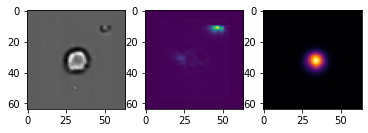

In [19]:
image_num = 452
fig, ax = plt.subplots(1,3, figsize=(6,2))
ax[0].imshow(x[image_num,:,:,0], cmap='gray')
ax[1].imshow(x[image_num,:,:,1])
ax[2].imshow(x[image_num,:,:,2], cmap='inferno')